In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

%matplotlib inline


In [3]:
!ls

01.ipynb                   TextAnalysisResearch.ipynb
02..ipynb                  all_tickets.csv
Readme.md


In [32]:
df = pd.read_csv("all_tickets.csv")
df.head()

,title,body,ticket_type,category,sub_category1,sub_category2,business_service,urgency,impact
0,NaN,hi since recruiter lead permission approve req...,1,4,2,21,71,3,4
1,connection with icon,icon dear please setup icon per icon engineers...,1,6,22,7,26,3,4
2,work experience user,work experience user hi work experience studen...,1,5,13,7,32,3,4
3,requesting for meeting,requesting meeting hi please help follow equip...,1,5,13,7,32,3,4
4,reset passwords for external accounts,re expire days hi ask help update passwords co...,1,4,2,76,4,3,4


In [7]:
df.columns

Index(['title', 'body', 'ticket_type', 'category', 'sub_category1',
       'sub_category2', 'business_service', 'urgency', 'impact'],
      dtype='object')

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ticket_type,48549.0,0.713115,0.452312,0.0,0.0,1.0,1.0,1.0
category,48549.0,4.491153,1.103556,0.0,4.0,4.0,5.0,12.0
sub_category1,48549.0,11.614390,13.752707,0.0,2.0,3.0,21.0,58.0
sub_category2,48549.0,32.004634,33.602122,0.0,7.0,21.0,53.0,114.0
business_service,48549.0,49.482605,22.806100,0.0,32.0,49.0,67.0,102.0
urgency,48549.0,2.506066,0.855646,0.0,2.0,3.0,3.0,3.0
impact,48549.0,3.677460,0.591513,0.0,3.0,4.0,4.0,4.0


In [15]:
corr = df.corr()
corr

,ticket_type,category,sub_category1,sub_category2,business_service,urgency,impact
ticket_type,1.000000,-0.098305,-0.710481,-0.204079,-0.143963,0.910132,0.859705
category,-0.098305,1.000000,0.321435,0.025340,0.095874,-0.089682,-0.303088
sub_category1,-0.710481,0.321435,1.000000,0.118061,0.083585,-0.680769,-0.658537
sub_category2,-0.204079,0.025340,0.118061,1.000000,0.048502,-0.179449,-0.165449
business_service,-0.143963,0.095874,0.083585,0.048502,1.000000,-0.131196,-0.143140
urgency,0.910132,-0.089682,-0.680769,-0.179449,-0.131196,1.000000,0.788253
impact,0.859705,-0.303088,-0.658537,-0.165449,-0.143140,0.788253,1.000000


<AxesSubplot:>

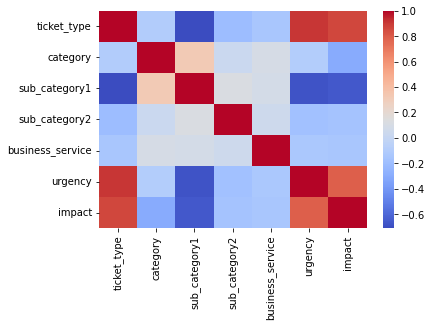

In [67]:
sns.heatmap(corr, cmap="coolwarm")

In [ ]:
from sklearn import linear_model
lr_model = linear_model.LinearRegression()

In [38]:
df["ticket_type"] = df["ticket_type"].apply(str)
df.dtypes

title               object
body                object
ticket_type         object
category             int64
sub_category1        int64
sub_category2        int64
business_service     int64
urgency              int64
impact               int64
dtype: object

In [47]:
dff = df.iloc[:,2:]
dff

,ticket_type,category,sub_category1,sub_category2,business_service,urgency,impact
0,1,4,2,21,71,3,4
1,1,6,22,7,26,3,4
2,1,5,13,7,32,3,4
3,1,5,13,7,32,3,4
4,1,4,2,76,4,3,4
...,...,...,...,...,...,...,...
48544,0,4,21,1,39,1,3
48545,0,4,9,41,10,2,3
48546,0,5,32,0,32,2,3
48547,0,4,21,41,35,1,3


array([[<AxesSubplot:xlabel='category', ylabel='category'>,
        <AxesSubplot:xlabel='sub_category1', ylabel='category'>,
        <AxesSubplot:xlabel='sub_category2', ylabel='category'>,
        <AxesSubplot:xlabel='business_service', ylabel='category'>,
        <AxesSubplot:xlabel='urgency', ylabel='category'>,
        <AxesSubplot:xlabel='impact', ylabel='category'>],
       [<AxesSubplot:xlabel='category', ylabel='sub_category1'>,
        <AxesSubplot:xlabel='sub_category1', ylabel='sub_category1'>,
        <AxesSubplot:xlabel='sub_category2', ylabel='sub_category1'>,
        <AxesSubplot:xlabel='business_service', ylabel='sub_category1'>,
        <AxesSubplot:xlabel='urgency', ylabel='sub_category1'>,
        <AxesSubplot:xlabel='impact', ylabel='sub_category1'>],
       [<AxesSubplot:xlabel='category', ylabel='sub_category2'>,
        <AxesSubplot:xlabel='sub_category1', ylabel='sub_category2'>,
        <AxesSubplot:xlabel='sub_category2', ylabel='sub_category2'>,
        <Axes

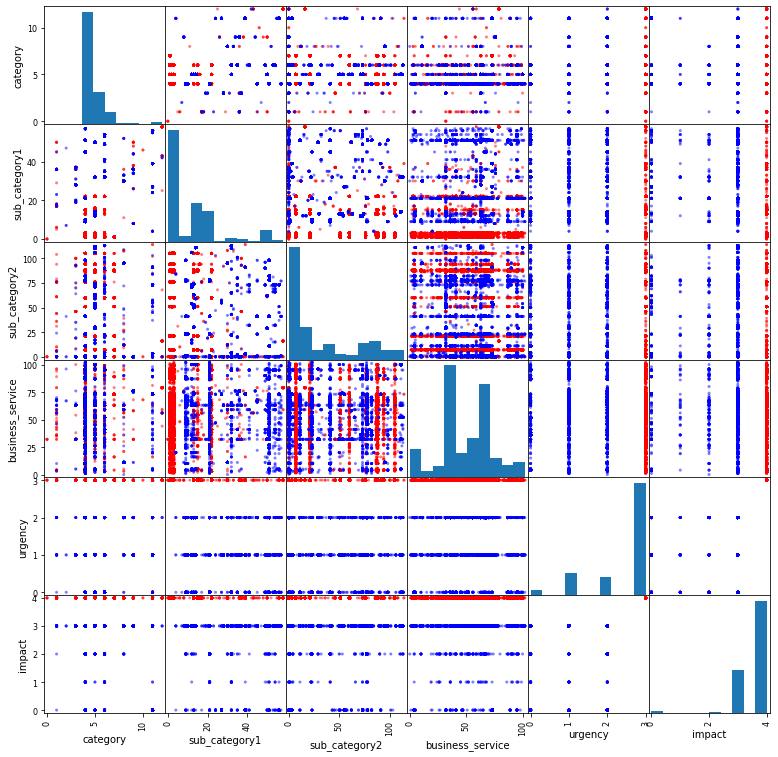

In [68]:

color_encoding = dff["ticket_type"].map(
    lambda ttype: "red" if ttype == "1" else "blue")
pd.plotting.scatter_matrix(dff, c=color_encoding, figsize=(13, 13))


<Figure size 432x288 with 0 Axes>

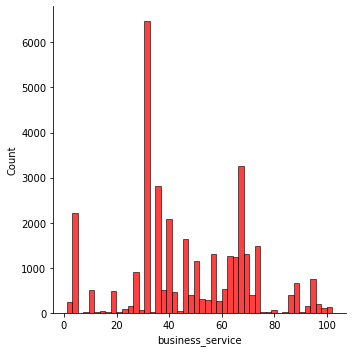

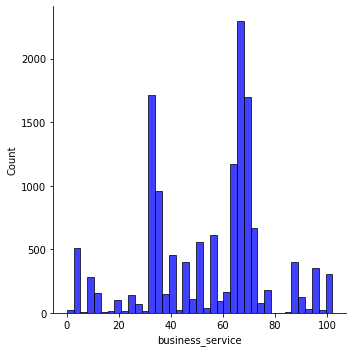

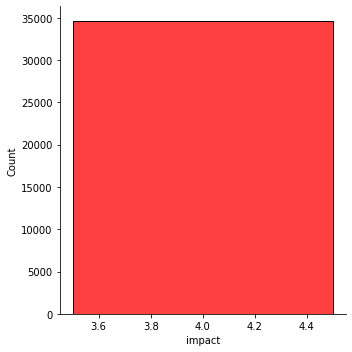

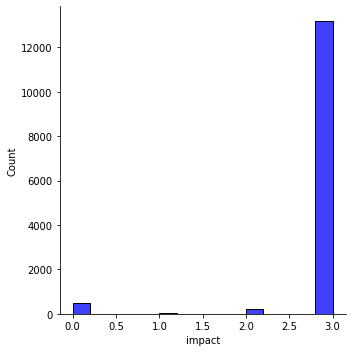

In [64]:
plt.figure()

sns.displot(dff[ dff["ticket_type"] == "1"]["business_service"], color="red", label="Ticket_1")
sns.displot(dff[dff["ticket_type"] == "0"]["business_service"],
            color="blue", label="Ticket_0")
sns.displot(dff[dff["ticket_type"] == "1"]["impact"],
            color="red", label="Ticket_1")
sns.displot(dff[dff["ticket_type"] == "0"]["impact"],
            color="blue", label="Ticket_0")

plt.show()


<AxesSubplot:>

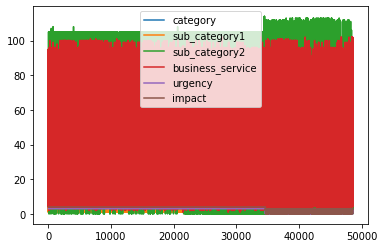

In [58]:
df.plot()